# IEEE Data - Statistical Analysis

Welcome to our sats notebook! We're going to be looking at some data from the IEEE brain bank. The data was taken over __48 trials__ (16 weeks) with each subject taking part in a __baseline pre-test__, then multiple types of __training tests__, and a benchmark __post-test after__ the training trials had been completed. The pre and post tests included the LSAT, as well as a figure series. The training tests included 3 visiospatial tasks and 3 change detection tasks.

<img src='DataBreakdown.jpg'>

In [1]:
# just importing the modules we'll need
%matplotlib inline
import pandas as pd
import os
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy.stats
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
    
# let's import our data as a dataframe for easy statistical analysis (td for testing data)
td = pd.read_csv(os.path.join(os.getcwd(),'PrePostData/TestingDataALL1.csv'))

>Let's start just by taking a look at the data to see what we're dealing with

In [2]:
td.head()

,Subject,Age,Gender,PreFigureSeries,PreLSATReasoning,PreLetterComp_Accuracy,PreLetterComp_AttemptedTrials,PreLetterComp_CorrectTrials,PreLetterComp_AvgRT,PreLetterComp_AvgCorrectTrialRT,PreDSST_Attempted,PreDSST_Correct,PreDSST_Accuracy,PostFigureSeries,PostLSATReasoning,PrePatternComp_Accuracy,PrePatternComp_AttemptedTrials,PrePatternComp_CorrectTrials,PrePatternComp_AvgRT,PrePatternComp_AvgCorrectTrialRT
0,10,21,1,24,13,0.869565,23.0,20.0,2465.565217,2281.150000,82,82,1.0,25,6,0.976744,43,42,1248.720930,1239.857143
1,11,20,2,20,15,0.962963,27.0,26.0,2074.962963,2062.730769,113,113,1.0,26,13,1.000000,30,30,1718.400000,1718.400000
2,12,20,1,15,11,1.000000,21.0,21.0,2679.047619,2679.047619,76,76,1.0,7,10,0.900000,30,27,1839.200000,1858.629630
3,13,21,2,18,10,0.958333,24.0,23.0,2348.083333,2417.652174,124,124,1.0,19,11,0.936170,47,44,1117.765957,1131.750000
4,14,21,1,20,14,1.000000,24.0,24.0,2239.333333,2239.333333,106,106,1.0,15,13,0.933333,45,42,1197.733333,1200.238095


Gross, looks like it's arbitrarily sorted. 
>Let's just fix that really quick.

In [19]:
# sort by Subject
td.set_index('Subject').head()

,Age,Gender,PreFigureSeries,PreLSATReasoning,PreLetterComp_Accuracy,PreLetterComp_AttemptedTrials,PreLetterComp_CorrectTrials,PreLetterComp_AvgRT,PreLetterComp_AvgCorrectTrialRT,PreDSST_Attempted,PreDSST_Correct,PreDSST_Accuracy,PostFigureSeries,PostLSATReasoning,PrePatternComp_Accuracy,PrePatternComp_AttemptedTrials,PrePatternComp_CorrectTrials,PrePatternComp_AvgRT,PrePatternComp_AvgCorrectTrialRT
Subject,,,,,,,,,,,,,,,,,,,
10,21,1,24,13,0.869565,23.0,20.0,2465.565217,2281.150000,82,82,1.0,25,6,0.976744,43,42,1248.720930,1239.857143
11,20,2,20,15,0.962963,27.0,26.0,2074.962963,2062.730769,113,113,1.0,26,13,1.000000,30,30,1718.400000,1718.400000
12,20,1,15,11,1.000000,21.0,21.0,2679.047619,2679.047619,76,76,1.0,7,10,0.900000,30,27,1839.200000,1858.629630
13,21,2,18,10,0.958333,24.0,23.0,2348.083333,2417.652174,124,124,1.0,19,11,0.936170,47,44,1117.765957,1131.750000
14,21,1,20,14,1.000000,24.0,24.0,2239.333333,2239.333333,106,106,1.0,15,13,0.933333,45,42,1197.733333,1200.238095


That's better. So it looks like we have two different pre/post tests to compare. The LSATReasoning, and the FigureSeries
***


## Analysis - Part 1

Let's plot both just to see what we're working with

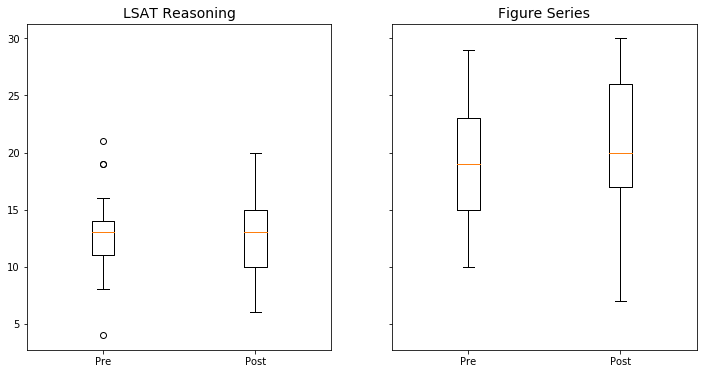

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
axes[0].boxplot([td['PreLSATReasoning'], td['PostLSATReasoning']], labels=["Pre", "Post"])
axes[0].set_title('LSAT Reasoning', fontsize=14)

axes[1].boxplot([td['PreFigureSeries'], td['PostFigureSeries']], labels=["Pre", "Post"])
axes[1].set_title('Figure Series', fontsize=14)
plt.show()

Hmm, doesn't look like there's much variation. Let's run some t-tests, though, just to be sure.
***
__Remember, a t-test is used to compare the means of two different samples in relation to the variations in the data.__

> our null hypothesis is that the pre and post series are not statistically different, which would result in a p-value > 0.05

In [5]:
scipy.stats.ttest_ind(td['PostFigureSeries'], td['PreFigureSeries']).pvalue

0.45076787849712463

In [6]:
scipy.stats.ttest_ind(td['PostLSATReasoning'], td['PreLSATReasoning']).pvalue

0.93779903968594625

Our p-values are 0.45 and 0.937. Not very promising.
<Enter> 

Conclusion:

__We cannot reject the null hypothesis__
***

## Analysis - Part 2

Let's do something else. Instead of looking at the pre/post tests, let's look at the training tests.
> __We'll try to plot each subject's difficulty level over time to see if we can describe the trend__

In [7]:
# import training data file names
os.path.join(os.getcwd(),'Subjects/ChangeDetection')
path = os.path.join(os.getcwd(),'Subjects/ChangeDetection')
filenames = glob.glob(path + "/*.csv")

# make a dataframe for each file
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame -- All Subjects' change detection data
allSubjects_cd = pd.concat(dfs, ignore_index=True)

>Let's check out what we have.

In [8]:
allSubjects_cd.head()

,Subject,Session,GamesPlayed,Version,AvgDifficulty,StartDifficulty,EndDifficulty,MinDifficulty,MaxDifficulty,AvgRT,AvgAccuracy
0,1,1,16.0,1,6.125000,3.0,8.0,3.0,8.0,1055.000000,84.250000
1,1,2,10.0,1,7.700000,8.0,9.0,7.0,9.0,1252.500000,79.500000
2,1,3,11.0,1,10.727273,9.0,12.0,9.0,12.0,1219.090909,81.818182
3,1,4,10.0,1,13.000000,12.0,14.0,12.0,14.0,1358.600000,76.100000
4,1,5,11.0,1,16.363636,14.0,20.0,14.0,20.0,1399.454545,77.272727


Awesome. The dataframe holds each subject's 48 trials and their ratings for each one. 
***
> let's just start by restructuring the dataframe for easy accessability.

In [9]:
# filtering for only the first version
allSubjects_version1 = allSubjects_cd.loc[allSubjects_cd['Version']==1]

# create a new data frame for just the average difficulties of game 1, all subs
allSubjects_avgDifficulty = pd.DataFrame()

for subject in range(1,25):
    df = pd.DataFrame()
    oneSubject = allSubjects_version1.loc[allSubjects_version1['Subject']==subject]
    oneSubject_avgDifficulty = oneSubject['AvgDifficulty'].values
    df['%d' % (subject)] = oneSubject_avgDifficulty.tolist()
    allSubjects_avgDifficulty = pd.concat([allSubjects_avgDifficulty, df], ignore_index=True, axis=1)

>now rename these absurdley long variables for brevity over clarity


In [10]:
ad = allSubjects_avgDifficulty
ad = allSubjects_avgDifficulty[np.logical_not(np.isnan(allSubjects_avgDifficulty))]

>and really quickly, look at the boxplot of the first and last trial difficulty distribution

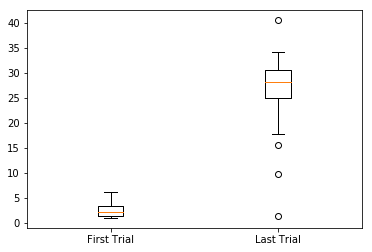

In [11]:
fig = figure()
plt.boxplot([ad.iloc[0], ad.iloc[40]], labels=["First Trial", "Last Trial"])
plt.show()

>plus a quick t-test, just to check.

In [12]:
scipy.stats.ttest_ind(ad.iloc[0], ad.iloc[40]).pvalue

1.1470033593210763e-17

awesome, that's what we like to see.

Now we know for sure that __there's a change between the first and last trials.__
>Let's plot all the data, then see if we can fit a model to that trend.

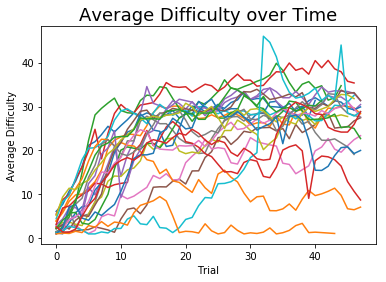

In [13]:
fig = figure()
for sub in range(0,24):
    plt.plot(ad.index, ad[sub])
plt.ylabel('Average Difficulty')
plt.xlabel('Trial')
plt.title('Average Difficulty over Time', fontsize=18)
plt.show()

Yikes. that's gnarly. But it does look like there's a trend.
> Let's try plotting it logarithmically to see if it gets more linear
<Enter>
> It will be easier to perform a regression on it that way.

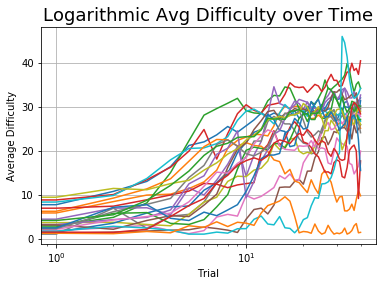

In [216]:
fig = figure()
for sub in range(0,24):
    plt.plot(ad.index, ad[sub])
plt.xscale('log')
plt.ylabel('Average Difficulty')
plt.xlabel('Trial')
plt.title('Logarithmic Avg Difficulty over Time', fontsize=18)
plt.grid(True)
plt.show()

Cool. looks like the perfect data set for a multiple linear regression
***

#### Mutiple Linear Regression

We're going to use the method called Ordinary Least Squares (OLS) which means we’re trying to fit a regression line that would minimize the sum of the square of distance of each point from the regression line.

In [16]:
import statsmodels.api as sm

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [203]:
ad.dropna(inplace=True)
X = np.log10(ad.index+1) # independent variable
y = ad[0] # dependent variable
y = sm.add_constant(y)
# Note the difference in argument order
model = sm.OLS(X, y).fit()
predictions = model.predict(y) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     240.2
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           2.92e-18
Time:                        14:10:28   Log-Likelihood:                 22.340
No. Observations:                  41   AIC:                            -40.68
Df Residuals:                      39   BIC:                            -37.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2522      0.097     -2.603      0.013      -0.448      -0.056
0              0.0563      0.004     15.498      0.000       0.049       0.064
==============================================================================
Omnibus:                        4.398   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                1.914
Skew:                           0.151   Prob(JB):                        0.384
Kurtosis:                       1.986   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

That's a lot of nonsense. (Omnibus, seroiusly?).
Basically, though, what we're looking at is a breakdown of the OLS analysis. Some are self explanatory -- like Method, and Model. The R number indicates the % of variance our model explains (82%). But what we care most about is the second table with the coef, std err, t, etc. The first column in that table gives us the __coefficients for the requisite linear equation (ours, for example, is y=16.7x+3.1)__. 
It also includes things like the 95% confidence interval and the p-values. We have an _almost_ significant value for b, and a significant one for m.


***
> Let's plot the regression on top of the data to see they fit.

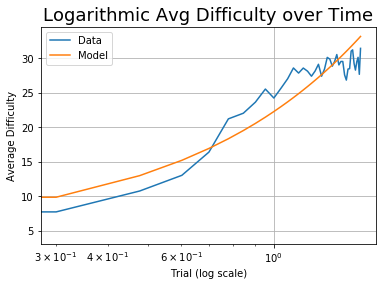

In [205]:
fig = figure()
data = plt.plot(np.log10(ad.index+1), ad[0], label='Data')
x = np.log10(ad.index+1)
y = (x +.2522)/0.0563
plt.plot(x, y, label='Model')
plt.xscale('log')
plt.ylabel('Average Difficulty')
plt.xlabel('Trial (log scale)')
plt.title('Logarithmic Avg Difficulty over Time', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

Hmm. Not bad. Now we'll include all 25 to see if we get better results.

In [208]:
ad.dropna(inplace=True)
X = np.log10(ad.index+1) # independent variable
ad['mean'] = ad.mean(axis=1)
y = ad[['mean']] # dependent variable
y = sm.add_constant(y)
# Note the difference in argument order
model = sm.OLS(X, y).fit()
predictions = model.predict(y) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     824.5
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           7.61e-28
Time:                        14:32:00   Log-Likelihood:                 45.487
No. Observations:                  41   AIC:                            -86.97
Df Residuals:                      39   BIC:                            -83.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.040      3.193      0.003       0.047       0.207
mean           0.0522      0.002     28.715      0.000       0.048       0.056
==============================================================================
Omnibus:                        6.761   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.841
Skew:                          -0.648   Prob(JB):                       0.0539
Kurtosis:                       4.318   Cond. No.                         68.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You'll note here that I could have added multiple dependent variables (eg. ad[0, 1, 2...]) instead of taking the average of the data row-wise. I decided to do the mean instead because it yielded less degrees of freedom (meaning I had 2 coefficients instead of 23), and was nominally accurate for our needs (R-squared of 0.955 vs 9.995).
> let's plot that one more time

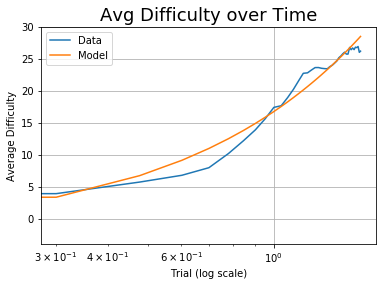

In [212]:
fig = figure()
data = plt.plot(np.log10(ad.index+1), ad['mean'], label='Data')
x = np.log10(ad.index+1)
y = (x -.1269)/0.0522
plt.plot(x, y, label='Model')
plt.xscale('log')
plt.ylabel('Average Difficulty')
plt.xlabel('Trial (log scale)')
plt.title('Avg Difficulty over Time', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()

Hey, looks pretty good. And the __R-squared is .955__ which is better than we can reasonably expect.
***

### __Stats Note__

##### After some research, we decided to use a regression instead of ANOVA, simply because it's easier to manipulate and interpret on a graphical level. The statistical process for each is fairly similar, if not the same.
Karen Grace-Martin from TheAnalysisFactor.com explains why:

_We can run this as either an ANOVA or a regression.  In the ANOVA, the categorical variable is effect coded, which means that each category’s mean is compared to the grand mean. In the regression, the categorical variable is dummy coded, which means that each category’s intercept is compared to the reference group’s intercept.  Since the intercept is defined as the mean value when all other predictors = 0, and there are no other predictors, the two intercepts are just means._

_So an ANOVA reports each mean and a p-value that says at least two are significantly different.  A regression reports only one mean(as an intercept), and the differences between that one and all other means, but the p-values evaluate those specific comparisons._

_It’s all the same model, the same information, but presented in different ways.  Understand what the model tells you in each way, and you are empowered._

Source:https://www.theanalysisfactor.com/why-anova-and-linear-regression-are-the-same-analysis/

## Summary



We now have a fairly good model for the trend in accuracy for a specific training test. Because we didn't find much difference with the LSAT and Figure test, this analysis could be useful in the future for describing behavior over time, and serve as a benchmark with which to compare further experiments.